<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PEC 2. Aprendizaje supervisado: problemas de clasificación**

## Introducción

En este ejercicio práctico, aplicaremos las técnicas de clasificación supervisada estudiadas en teoría para resolver un problema práctico utilizando datos reales de un gimnasio. La idea es clasificar a los miembros en función de las calorías que queman durante sus sesiones de ejercicio, lo que podría ayudar a personalizar los planes de entrenamiento de manera más efectiva.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.


# Descripción del dataset:

El conjunto de datos utilizado para esta PEC se basa en **información de miembros de un gimnasio y sus actividades de ejercicio**. Se busca predecir el nivel de calorías quemadas por los miembros a partir de diferentes características demográficas, fisiológicas y de actividad física.

Descarga: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data

*   Variables:
  *   Age: Edad del miembro.
  *   Gender: Género del miembro.
  *   Experience_Level: Nivel de experiencia en el gimnasio (Principiante, Intermedio, Avanzado).
  *   Max_BPM, Avg_BPM, Resting_BPM: Ritmos cardíacos durante las sesiones de ejercicio.
  *   BMI: Índice de Masa Corporal.
  *   Fat_Percentage: Porcentaje de grasa corporal.
  *   Session_Duration (hours): Duración de la sesión de entrenamiento.
  *   Workout_Type: Tipo de entrenamiento realizado (Cardio, Fuerza, HIIT, etc.).
  *   Calories_Burned: Calorías quemadas (variable continua).

  *   **Variable objetivo:** Calories_Level (nueva variable categórica):
      *   low: Menos de 700 calorías.
      *   medium: Entre 700 y 1000 calorías.
      *   high: Más de 1000 calorías.


Puedes crear nuevas celdas para completar la resolución de los ejercicios.




## **Ejercicio 1 [ 1 punto ]** Análisis Exploratorio de Datos (EDA)

Realiza un análisis exploratorio del conjunto de datos para comprender mejor su estructura y prepararlo para el modelado. Sigue los pasos indicados a continuación.

### Paso 1: Carga de Datos
Carga el conjunto de datos y muestra las primeras filas para familiarizarte con las variables.
*   Importa pandas, numpy, matplotlib, y seaborn para el análisis y visualización de datos.
*   Utiliza pandas.read_csv() para leer el archivo gym_members_exercise_tracking.
csv.
*   Muestra las primeras filas del dataset usando head() para tener una vista rápida de los datos.

In [ ]:
# Importa las librerías necesarias

# Cargar el dataset
df =

# Mostrar las primeras 5 filas


### Paso 2: Entender la Estructura de los Datos
*   Utiliza shape para conocer cuántas filas y columnas tiene el dataset.
*   Usa info() para ver los tipos de datos de cada columna y la cantidad de valores no nulos.
*   Utiliza describe() para obtener un resumen estadístico de las columnas numéricas (media, desviación estándar, mínimos, máximos, etc.).


In [ ]:
# Verificar la forma del dataset


# Ver información sobre las columnas


# Resumen estadístico de las variables numéricas


### Paso 3: Identificación de Datos Faltantes y Duplicados
*   Usa isnull().sum() para identificar si hay valores nulos en alguna columna y cuántos.
  *   Tanto si encuentras columnas con valores nulos como si no, reflexiona sobre cómo manejarlos.
*   Verifica si hay filas duplicadas con duplicated().sum() y, de ser necesario, elimina los duplicados utilizando drop_duplicates().


In [ ]:
# Verificar valores nulos


# Verificar filas duplicadas


### Paso 4: Análisis de Variables Categóricas
*   Identifica las variables categóricas.
*   Utiliza gráficos de barras con seaborn (countplot) para visualizar la distribución de estas variables.


Respuesta:

### Paso 5: Análisis de Variables Numéricas
*   Identifica las variables numéricas.
*   Usa gráficos de dispersión (scatterplot) y boxplots para analizar la distribución de estas variables y detectar posibles outliers.


Respuesta:

### Paso 6: Creación de la Variable Calories_Level

La columna Calories_Burned tiene valores numéricos continuos, que representan la cantidad exacta de calorías quemadas por cada miembro en sus sesiones de ejercicio.

Si quisiéramos predecir un valor exacto de calorías quemadas (por ejemplo, 750.5 calorías), estaríamos ante un problema de regresión.

Dado que queremos que el ejercicio sea de clasificación, lo tranformaremos:

Esta variable Calories_Level categoriza el rango de calorías quemadas en tres grupos:
*   low: Para aquellos que queman menos de 700 calorías.
*   medium: Para aquellos que queman entre 700 y 1000 calorías.
*   high: Para aquellos que queman más de 1000 calorías.

Pasos:

*   Divide la columna Calories_Burned en tres categorías: low, medium, y high usando pd.cut().
*   Muestra la cantidad de registros en cada categoría usando value_counts().
*   Crea un gráfico de barras (barplot) para visualizar cuántos miembros caen en cada categoría (low, medium, high).
*   Comenta sobre la distribución de los niveles de calorías quemadas y lo que podría significar para la personalización de los entrenamientos.


In [ ]:
# Creación de la variable categórica 'Calories_Level'

# Ver la cantidad de registros en cada categoría


In [ ]:
# Gráfico de barras para 'Calories_Level'


## **Ejercicio 2 [ 0.5 puntos ]** Describe el dataset

Para ello utiliza el análisis que has realizado en el ejercicio anterior. Identifica las variables explicativas de la variable a predecir

*pon tu respuesta entre aquí*
A continuación se presenta una descripción del dataset basado en el análisis realizado en los pasos anteriores:

1. **Descripción general del dataset**:
   - Este dataset contiene información sobre sesiones de ejercicio de los miembros de un gimnasio, incluyendo datos demográficos, fisiológicos y de actividad física.
   - La variable objetivo creada, **`Calories_Level`**, clasifica a los miembros en tres niveles de calorías quemadas: **low** (menos de 700 calorías), **medium** (entre 700 y 1000 calorías), y **high** (más de 1000 calorías).
   - La mayoría de los miembros caen en la categoría "medium", seguida de "high", y en menor proporción en "low".

2. **Variables explicativas y su relación con `Calories_Level`**:
   - **Age (Edad)**: No se observó una correlación directa con las calorías quemadas. Puede influir en el tipo de entrenamiento y en la intensidad recomendada, pero no es determinante para `Calories_Level`.
   - **Gender (Género)**: No se ha explorado a fondo, pero podría tener algún impacto en la capacidad de quema de calorías debido a diferencias fisiológicas.
   - **Weight (kg) y BMI**: Aunque muestran cierta dispersión, el peso y el índice de masa corporal (BMI) tienen una relación moderada con el nivel de calorías quemadas. Los miembros con mayor peso tienden a quemar más calorías debido al esfuerzo adicional.
   - **Max_BPM, Avg_BPM, Resting_BPM**: Estas variables de ritmo cardíaco no mostraron una correlación clara con `Calories_Level`. Sin embargo, los ritmos más altos podrían indicar sesiones de mayor intensidad, lo cual indirectamente podría estar asociado a una quema calórica elevada.
   - **Session Duration (Duración de la sesión)**: Es una de las variables más relevantes, mostrando una correlación positiva clara con `Calories_Burned`. Sesiones más largas suelen resultar en un mayor gasto calórico.
   - **Fat_Percentage (Porcentaje de grasa)**: Muestra una relación inversa con las calorías quemadas, ya que los miembros con menor porcentaje de grasa tienden a quemar más calorías, posiblemente debido a una mayor capacidad cardiovascular o metabólica.
   - **Water_Intake (litros de agua)**: No se observó relación directa con `Calories_Level`, aunque una mayor ingesta podría ser un indicador de ejercicios de mayor duración o intensidad.
   - **Workout_Frequency (Frecuencia de entrenamiento)**: La frecuencia de entrenamiento no mostró una relación clara con las calorías quemadas en cada sesión, pero puede influir en el nivel de condición física de los miembros.
   - **Experience_Level (Nivel de experiencia)**: No mostró una correlación directa con `Calories_Burned`, aunque niveles de experiencia más altos pueden estar asociados con sesiones más intensas o especializadas.

3. **Conclusiones sobre las variables explicativas**:
   - Las variables **`Session Duration`** y **`Fat Percentage`** parecen ser las más significativas para predecir `Calories_Level`, ya que tienen una relación más directa con la quema de calorías.
   - **Weight (kg)** y **BMI** también son variables importantes, aunque de forma más moderada.
   - Variables como **Max_BPM** y **Avg_BPM** pueden servir de apoyo para entender la intensidad de las sesiones, pero no son tan determinantes por sí solas.
   - Las demás variables aportan contexto y pueden enriquecer el modelo, pero no son esenciales para la predicción directa del nivel de calorías quemadas.

Este análisis permite seleccionar variables relevantes para modelos de clasificación y orienta a la personalización de los entrenamientos según el nivel de quema calórica de los miembros.

## **Ejercicio 3 [ 2.5 puntos ]** Preprocessamiento de los datos

Usa [sklearn preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) i/o pandas para hacer el procesamient de los datos del dataset:


**3 a) [0,5 puntos]** divide entre los datos explicativos (X) y a predecir (y):

Divide el conjunto de datos en las variables explicativas (X) y la variable objetivo (y). La variable objetivo es Calories_Level, que indica si un miembro quema low, medium, o high calorías.

In [ ]:
# pon tu código entre aquí
# Dividimos en inputs y outputs


# y aquí

# Mostrar las primeras filas de X


In [ ]:
X.head()

**3 b) [1 punto]:** Transformación de datos:
*   Transforma las variables explicativas de categóricas a numéricas. Realiza una codificación OneHot de las variables categóricas Workout_Type y Gender para convertirlas en variables numéricas.
*   Transforma la variable y (Calories_Level) a valores numéricos utilizando LabelEncoder.

In [ ]:
# pon tu código entre aquí
# Realizar la codificación OneHot de las variables categóricas


# Definir la transformación OneHot para las variables categóricas


# Transformar el conjunto de datos


# y aquí

# Mostrar la forma del conjunto de características transformadas


In [ ]:
# pon tu código entre aquí
# Importar LabelEncoder de sklearn


# Transformar y utilizando LabelEncoder


# y aquí

# Mostrar los primeros valores de y_encoded


**3 c)  [ 0,5 puntos ]** Normalización de las variables numéricas

Escala las variables numéricas usando StandardScaler para que todas las características numéricas tengan una media de 0 y una desviación estándar de 1.

In [ ]:
# Escalar las variables numéricas

# Mostrar la forma del conjunto de características transformadas y un ejemplo de las características escaladas


**3 d) [1 punto]:**  División del Conjunto de Datos en Entrenamiento y Prueba:
*   Divide el conjunto de datos en un conjunto de entrenamiento (80%) y uno de prueba (20%) usando train_test_split con una semilla de 42. Utiliza X_transformed y y.

In [ ]:
# Importar train_test_split de sklearn



# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test =


# Mostrar las formas de los conjuntos de entrenamiento y prueba



## **Ejercicio 4 [ 1 punto ]** Entrenamiento de un modelo de Clasificación basado en [DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Una vez generado el modelo, ya podemos entrenarlo y generar las matrices de confusión y las principales estadísticas:
  - Utiliza los datos preprocesados para entrenar el modelo
  - Haz las predicciones con los datos apropiados
  - Evalúa el modelo generando la matriz de confusión y haciendo un [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
# pon tu código entre aquí

seed = 5

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model =

model.fit(X_train, y_train)


y_pred =

In [ ]:
from sklearn.metrics import classification_report


## **Ejercicio 5 [ 1 punto ]** Análisis de los resultados obtenidos.

Analiza la matriz de confusión obtenida y la clasificación report del ejercicio anterior. Para ello, compáralo con los resultados obtenidos con el modelo de prueba que se ofrece a continuación.

¿Qué métricas son las adecuadas para analizar los resultados obtenidos en el dataset propuesto?

In [ ]:
y_pred_toy_model = [0] * len(y_test)

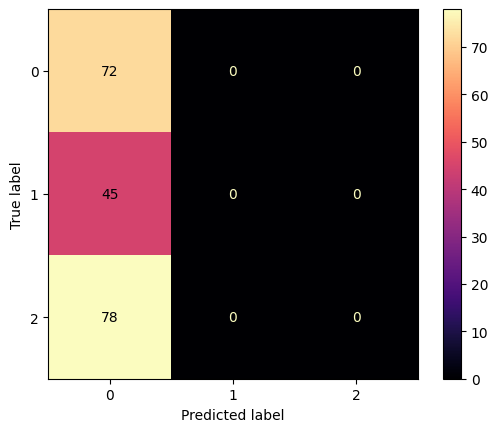

In [ ]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, y_pred_toy_model, labels=model.classes_), display_labels=model.classes_)
cm.plot(cmap="magma")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_toy_model))

*pon tu respuesta entre aquí*


## **Ejercicio 6 [ 1 punto ]** Mejora del método

Prueba parametros del modelo de classificación basado en Decision trees hasta mejorar los resultados

In [ ]:
# pon tu código entre aquí
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ("gini", "entropy", "log_loss"), 'max_depth': (3, 10, 20, 50)}


## **Ejercicio 7 [ 1,5 puntos ]** Comparación con otros métodos

Prueba varios métodos (como mínimo dos):
  * Naive Bayes
  * Regresión logística
  * kNN
  * Clasificador lineal (basado en distancias, en producto escalar o en kernels)
  * Support Vector Machine (SVM)
  * Redes neuronales

Y compara los resultados obtenidos con el Decision tree

*analiza los resultados obtenidos entre aquí*



## **Ejercicio 8 [ 1,5 puntos ]** Análisis de los sesgos

Analiza los posibles sesgos que pueda tener la base de datos con la que hemos trabajado en esta PEC.
Analiza si factores como los siguientes tienen un efecto en los resultados obtenidos:
  - Que haya mayor representatividad de hombres que mujeres en la base de datos:
  - Que haya una mayor representatividad de ciertos tipos de entrenamiento (Workout_Type)
  - Que haya un sesgo a nivel de experiencia de los usuarios (Experience_Level)

Para ello, analiza cómo se comportan los modelos obtenidos en los diversos casos y razona la respuesta.

In [ ]:
# pon tu código entre aquí


## **Fuentes y recursos de interés:**
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/